Code


In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Data Preprocessing

In [2]:
#read data
ebay = pd.read_excel('ebayAuctions.xlsx', sheetname='eBay auctions')

In [3]:
ebay.head()

Category Currency  sellerRating  Duration endDay  ClosePrice  \
0  Music/Movie/Game       US          3249         5    Mon        0.01   
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive  
0       0.01            0  
1       0.01            0  
2       0.01            0  
3       0.01            0  
4       0.01            0

In [4]:
#create dummy variables for categorical predictors: Category, Currency, Duration, EndDay
dcategory = pd.get_dummies(ebay, columns=['Category'], drop_first=True)


In [5]:
dcurrency = pd.get_dummies(dcategory, columns=['Currency'], drop_first=True)

In [6]:
dduration = pd.get_dummies(dcurrency, columns=['Duration'], drop_first=True)

In [7]:
ebaydata = pd.get_dummies(dduration, columns=['endDay'], drop_first=True)

In [8]:
ebaydata.head()

sellerRating  ClosePrice  OpenPrice  Competitive  Category_Automotive  \
0          3249        0.01       0.01            0                    0   
1          3249        0.01       0.01            0                    0   
2          3249        0.01       0.01            0                    0   
3          3249        0.01       0.01            0                    0   
4          3249        0.01       0.01            0                    0   

   Category_Books  Category_Business/Industrial  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   Category_Clothing/Accessories  Category_Coins/Stamps  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Category_Collectibles     ...      Duration_3  Duration_5  Duration_7  \
0                      0     ...               0           1           0   
1                      0     ...               0           1           0   
2                      0     ...               0           1           0   
3                      0     ...               0           1           0   
4                      0     ...               0           1           0   

   Duration_10  endDay_Mon  endDay_Sat  endDay_Sun  endDay_Thu  endDay_Tue  \
0            0           1           0           0           0           0   
1            0           1           0           0           0           0   
2            0           1           0           0           0           0   
3            0           1           0           0           0           0   
4            0           1           0           0           0           0   

   endDay_Wed  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 33 columns]

#### Seperate target from predictors

In [9]:
y = ebaydata.Competitive
X = ebaydata.drop('Competitive', axis=1)

#### Split into training and test datasets

In [10]:
#60% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8) 

#### Build Decision Tree Model for classification

In [11]:
#create Decision Tree Classifier object
tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) #set minimum number of records in a terminal node to 50

#fit training dataset
tree = tree.fit(X_train, y_train)

#classify the validation set
y_pred = tree.predict(X_test)

#### Evaluate the model performance

In [12]:
#y_pred
tree.score(X_test, y_test)

0.8365019011406845

In [13]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[298,  65],
       [ 64, 362]])

In [14]:
#visualize the Decision Tree
tree_plot = export_graphviz(tree, out_file = None, feature_names = X_train.columns)
graph = graphviz.Source(tree_plot)
graph.render()

'Source.gv.pdf'

The Source.gv.pdf file contains the whole decision tree.

This model is not usable for prediciting the outcome of a new auction, as some variables in the decision tree cannot be known before the end of an auction.

These variables are:
* Duration
* endDay
* ClosePrice

Therefore, go back to the original dataset "ebay":

In [15]:
ebay.head()

Category Currency  sellerRating  Duration endDay  ClosePrice  \
0  Music/Movie/Game       US          3249         5    Mon        0.01   
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive  
0       0.01            0  
1       0.01            0  
2       0.01            0  
3       0.01            0  
4       0.01            0

In [16]:
#drop the variables that cannot be known in advance of a new auction
mydata = ebay.drop(['Duration','endDay','ClosePrice'], axis=1)

In [17]:
#create dummy variables for categorical predictors: Category, Currency
dc = pd.get_dummies(mydata, columns=['Category'], drop_first=True)
ebaynew = pd.get_dummies(dc, columns=['Currency'], drop_first=True)

In [18]:
ebaynew.head()

sellerRating  OpenPrice  Competitive  Category_Automotive  Category_Books  \
0          3249       0.01            0                    0               0   
1          3249       0.01            0                    0               0   
2          3249       0.01            0                    0               0   
3          3249       0.01            0                    0               0   
4          3249       0.01            0                    0               0   

   Category_Business/Industrial  Category_Clothing/Accessories  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   Category_Coins/Stamps  Category_Collectibles  Category_Computer  \
0                      0                      0                  0   
1                      0                      0                  0   
2                      0                      0                  0   
3                      0                      0                  0   
4                      0                      0                  0   

      ...       Category_Health/Beauty  Category_Home/Garden  \
0     ...                            0                     0   
1     ...                            0                     0   
2     ...                            0                     0   
3     ...                            0                     0   
4     ...                            0                     0   

   Category_Jewelry  Category_Music/Movie/Game  Category_Photography  \
0                 0                          1                     0   
1                 0                          1                     0   
2                 0                          1                     0   
3                 0                          1                     0   
4                 0                          1                     0   

   Category_Pottery/Glass  Category_SportingGoods  Category_Toys/Hobbies  \
0                       0                       0                      0   
1                       0                       0                      0   
2                       0                       0                      0   
3                       0                       0                      0   
4                       0                       0                      0   

   Currency_GBP  Currency_US  
0             0            1  
1             0            1  
2             0            1  
3             0            1  
4             0            1  

[5 rows x 22 columns]

In [19]:
y = ebaynew.Competitive
X = ebaynew.drop('Competitive', axis=1)

In [20]:
#60% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8) 

In [21]:
#create Decision Tree Classifier object
tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50) #set minimum number of records in a terminal node to 50

#fit training dataset
tree = tree.fit(X_train, y_train)

#classify the validation set
y_pred = tree.predict(X_test)

In [22]:
tree.score(X_test, y_test)

0.7376425855513308

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[286,  77],
       [130, 296]])

In [24]:
#visualize the Decision Tree
tree_plot = export_graphviz(tree, out_file = None, feature_names = X_train.columns)
graph = graphviz.Source(tree_plot)
graph.render()


'Source.gv.pdf'

In [30]:
from sklearn.datasets import make_blobs

plt.scatter(X[:, ], X[:, ], c=y, s=50, cmap='rainbow');

TypeError: unhashable type: 'slice'

TypeError: unhashable type: 'slice'

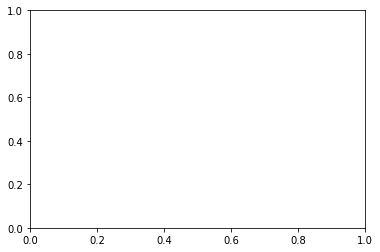